IMPORTO I DATI DEL DATASET

In [2]:
import pandas as pd
df = pd.read_csv("dataset1.csv")

df.head()

,customer_id,sesso,età,data_iscrizione,tipo_abbonamento,prezzo_abbonamento,ultima_presenza,media_presenze_sett,giorni_da_ultima_presenza,ha_rinnovato,churn
0,CUST0000,M,56,2023-07-29,trimestrale,80,2025-05-10,1.88,43,True,0
1,CUST0001,M,38,2025-01-06,trimestrale,80,2025-06-16,2.19,6,True,0
2,CUST0002,M,36,2024-05-28,trimestrale,80,2025-02-23,0.00,119,False,1
3,CUST0003,M,57,2023-08-06,mensile,30,2025-06-20,2.25,2,True,0
4,CUST0004,M,39,2024-11-04,trimestrale,80,2025-06-06,1.66,16,False,0


CONVERTO LA DATA NEL FORMATAO DATA TIME DI PANDAS E MI RECUPERO SINGOLARMENTE I CAMPI DELLA DATA

In [3]:
df['data_iscrizione'] = pd.to_datetime(df['data_iscrizione'])

df['anno_iscrizione'] = df['data_iscrizione'].dt.year
df['mese_iscrizione'] = df['data_iscrizione'].dt.month
# df['giorno_iscrizione'] = df['data_iscrizione'].dt.day

df.drop('data_iscrizione', axis=1, inplace=True)

In [4]:
df['ultima_presenza'] = pd.to_datetime(df['ultima_presenza'])

# df['anno_ultima_presenza'] = df['ultima_presenza'].dt.year
df['mese_ultima_presenza'] = df['ultima_presenza'].dt.month
# df['giorno_ultima_presenza'] = df['ultima_presenza'].dt.day

df.drop('ultima_presenza', axis=1, inplace=True)

Faccio il laberEncoder della colonna tipo abbonamento, per separare i 3 dati in valori categorici, che vanno da 0 ad n, dove n e' il numero di dati della feature 

annuale 0, mensile 1, trimestrale 2

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tipo_abbonamento_encoder'] = le.fit_transform(df['tipo_abbonamento'])

df.drop('tipo_abbonamento', axis=1, inplace=True)
print(df.head())

  customer_id sesso  età  prezzo_abbonamento  media_presenze_sett  \
0    CUST0000     M   56                  80                 1.88   
1    CUST0001     M   38                  80                 2.19   
2    CUST0002     M   36                  80                 0.00   
3    CUST0003     M   57                  30                 2.25   
4    CUST0004     M   39                  80                 1.66   

   giorni_da_ultima_presenza  ha_rinnovato  churn  anno_iscrizione  \
0                         43          True      0             2023   
1                          6          True      0             2025   
2                        119         False      1             2024   
3                          2          True      0             2023   
4                         16         False      0             2024   

   mese_iscrizione  mese_ultima_presenza  tipo_abbonamento_encoder  
0                7                     5                         2  
1                1        

FACCIO IL ONE HOT PER SEPARARE SESSO IN VARIABILI BOOLEANE 0 E 1

In [6]:
df_encoded = pd.get_dummies(df, columns=['sesso'])

SEPARO LE COLONNE PER L'ADDESTRAMENTO CON IL TARGET

In [7]:
X = df_encoded.drop(['churn', 'customer_id', 'ha_rinnovato'], axis=1)
y = df_encoded['churn']

print(X.head())
print(y.head())

   età  prezzo_abbonamento  media_presenze_sett  giorni_da_ultima_presenza  \
0   56                  80                 1.88                         43   
1   38                  80                 2.19                          6   
2   36                  80                 0.00                        119   
3   57                  30                 2.25                          2   
4   39                  80                 1.66                         16   

   anno_iscrizione  mese_iscrizione  mese_ultima_presenza  \
0             2023                7                     5   
1             2025                1                     6   
2             2024                5                     2   
3             2023                8                     6   
4             2024               11                     6   

   tipo_abbonamento_encoder  sesso_F  sesso_M  
0                         2    False     True  
1                         2    False     True  
2                   

true = 1, false = 0 

In [8]:
print(df_encoded.head())

  customer_id  età  prezzo_abbonamento  media_presenze_sett  \
0    CUST0000   56                  80                 1.88   
1    CUST0001   38                  80                 2.19   
2    CUST0002   36                  80                 0.00   
3    CUST0003   57                  30                 2.25   
4    CUST0004   39                  80                 1.66   

   giorni_da_ultima_presenza  ha_rinnovato  churn  anno_iscrizione  \
0                         43          True      0             2023   
1                          6          True      0             2025   
2                        119         False      1             2024   
3                          2          True      0             2023   
4                         16         False      0             2024   

   mese_iscrizione  mese_ultima_presenza  tipo_abbonamento_encoder  sesso_F  \
0                7                     5                         2    False   
1                1                     6  

SEPARO IN TRAIN E TEST I DATI

In [9]:
df_encoded.to_csv("df_encoded.csv", index=False)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

MI VADO A CREARE IL DATSET CHE USERO' PER SALVARE IL VALORE DELLA PREDIZIONE SUI DATI DI TEST PER QUEL SINGOLO UTENTE PER METTERLI A CONFRONTO COL VALORE VERO

In [11]:
df_test = df.loc[X_test.index] 
df_test.to_csv("df_test.`csv", index=False)


DEFINISCO IL MODELLO

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,         
    max_depth=None,          
    min_samples_split=2,      
    min_samples_leaf=1,       
    max_features='sqrt',      
    class_weight='balanced',  
    random_state=42,          
    n_jobs=-1                 
)

ADDESTRO IL MODELLO

In [13]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

CONTROLLO LE PREDIZIONI

In [14]:
for i, pred in enumerate(y_pred):
    customer_id = df_test.iloc[i]['customer_id']
    
    valore_reale = df[df['customer_id'] == customer_id]['churn'].values[0]

    print(f"L'utente con id {customer_id} è stato predetto come {pred}, il valore reale era {valore_reale}")


L'utente con id CUST0521 è stato predetto come 1, il valore reale era 1
L'utente con id CUST0737 è stato predetto come 0, il valore reale era 0
L'utente con id CUST0740 è stato predetto come 0, il valore reale era 1
L'utente con id CUST0660 è stato predetto come 0, il valore reale era 0
L'utente con id CUST0411 è stato predetto come 1, il valore reale era 1
L'utente con id CUST0678 è stato predetto come 0, il valore reale era 0
L'utente con id CUST0626 è stato predetto come 0, il valore reale era 0
L'utente con id CUST0513 è stato predetto come 0, il valore reale era 0
L'utente con id CUST0859 è stato predetto come 0, il valore reale era 0
L'utente con id CUST0136 è stato predetto come 0, il valore reale era 0
L'utente con id CUST0811 è stato predetto come 1, il valore reale era 1
L'utente con id CUST0076 è stato predetto come 0, il valore reale era 0
L'utente con id CUST0636 è stato predetto come 0, il valore reale era 1
L'utente con id CUST0973 è stato predetto come 0, il valore real

FACCIO UN'ANALISI QUALITATIVA DEI RISULTATI

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy:  {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}")
print(f"Recall:    {recall*100:.2f}")
print(f"F1 Score:  {f1*100:.2f}")
print(f"AUC:       {auc*100:.2f}")

Accuracy:  91.00%
Precision: 88.73
Recall:    76.83
F1 Score:  82.35
AUC:       86.58


IMPLEMENTAZIONE VISIVA DEL PRIMO ALBERO

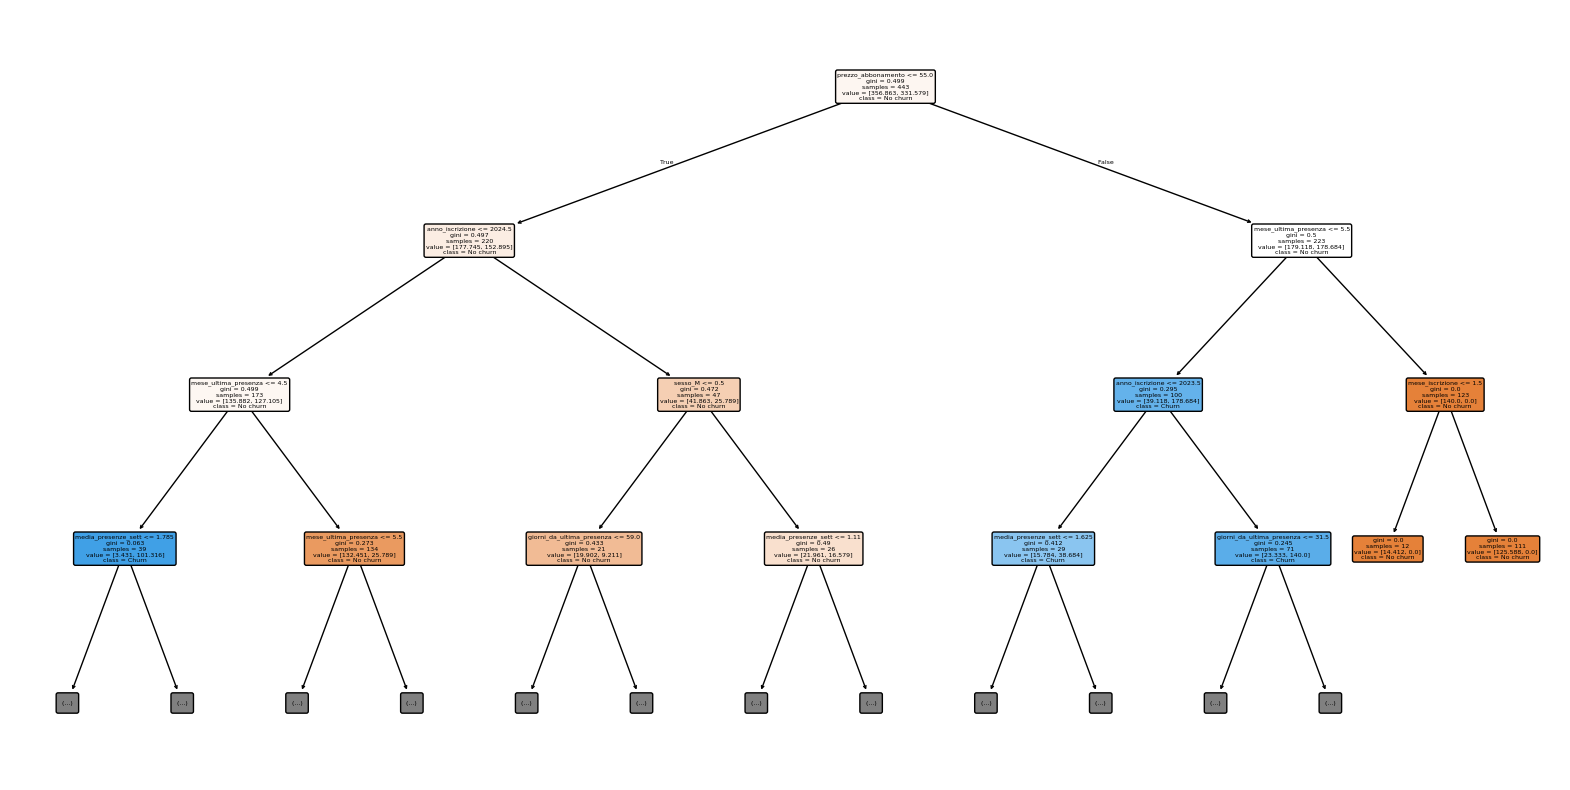

In [16]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

first_tree = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(first_tree,
          feature_names=X.columns,
          class_names=['No churn', 'Churn'],
          filled=True,
          rounded=True,
          max_depth=3) 
plt.show()


IMPLEMENTAZIONE VISIVA DELLA FORESTA

In [17]:
export_graphviz(first_tree,
                out_file='tree.dot',
                feature_names=X.columns,
                class_names=['No churn', 'Churn'],
                rounded=True,
                filled=True)

# da terminale:
# dot -Tpng tree.dot -o tree.png


DEFINISCO UN NUOVO SET DI DATI DINAMICI DA INSERIRE PER FARE NUOVE PREDIZIONI, E VERIFICO QUANTO LE FEATURES DEL DATASET SONO STATE IMPORTANTI PER LA PREDIZIONE

In [18]:
dati = "età, prezzo_abbonamento, media_presenze_sett, giorni_da_ultima_presenza, anno_iscrizione, mese_iscrizione, tipo_abbonamento_encoder, sesso_F, sesso_M"
lista = dati.split(",")

DECOMMENTARE SE SI VUOLE PROVARE DINAMICAMENTE

In [19]:
valori_presenza = []
print(lista)

for i, val in enumerate(lista):
    while True:
        try:
            valore = float(input(f"Inserisci il valore di '{val}': "))
            valori_presenza.append(valore)
            print(f"Il valore di '{val}' è {valori_presenza[i]}")
            break 
        except ValueError:
            print("Valore non valido! Inserisci un numero (es. 3 o 3.5).")

['età', ' prezzo_abbonamento', ' media_presenze_sett', ' giorni_da_ultima_presenza', ' anno_iscrizione', ' mese_iscrizione', ' tipo_abbonamento_encoder', ' sesso_F', ' sesso_M']
Il valore di 'età' è 50.0
Il valore di ' prezzo_abbonamento' è 80.0
Il valore di ' media_presenze_sett' è 2.0
Il valore di ' giorni_da_ultima_presenza' è 200.0
Il valore di ' anno_iscrizione' è 2025.0
Il valore di ' mese_iscrizione' è 2.0
Il valore di ' tipo_abbonamento_encoder' è 1.0
Il valore di ' sesso_F' è 0.0
Il valore di ' sesso_M' è 1.0


In [20]:
import numpy as np
import joblib
modello_presenza = joblib.load("/home/matteo/matteo/programmazione/saaschurnpalestre/python/modello_ultima_presenza.pkl")

valori_presenza = np.array(valori_presenza)
# valori_presenza = np.array([27, 80, 3, 3, 2023, 2, 0, 1, 0])
valori_presenza_2d = valori_presenza.reshape(1, -1)

pred_presenza = modello_presenza.predict(valori_presenza_2d)
print(pred_presenza)

[3.71]


/home/matteo/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [21]:
dati = "età, prezzo_abbonamento, media_presenze_sett, giorni_da_ultima_presenza, anno_iscrizione, mese_iscrizione, mese_utlima_presenza, tipo_abbonamento_encoder, sesso_F, sesso_M"
lista = dati.split(",")
importanza = model.feature_importances_
for i in range(len(lista)):
    print(f"il dato {lista[i]} e' stato utile per la classificazione al {importanza[i]*100:.2f}%")

il dato età e' stato utile per la classificazione al 5.78%
il dato  prezzo_abbonamento e' stato utile per la classificazione al 1.22%
il dato  media_presenze_sett e' stato utile per la classificazione al 19.31%
il dato  giorni_da_ultima_presenza e' stato utile per la classificazione al 40.21%
il dato  anno_iscrizione e' stato utile per la classificazione al 1.33%
il dato  mese_iscrizione e' stato utile per la classificazione al 3.73%
il dato  mese_utlima_presenza e' stato utile per la classificazione al 26.11%
il dato  tipo_abbonamento_encoder e' stato utile per la classificazione al 0.99%
il dato  sesso_F e' stato utile per la classificazione al 0.67%
il dato  sesso_M e' stato utile per la classificazione al 0.65%


Codice per salvare i valori delle feature importans in json

In [22]:
import json

feature_importance = {lista[i].strip(): round(importanza[i]*100, 2) for i in range(len(lista))}

with open("/home/matteo/matteo/programmazione/saaschurnpalestre/public/feature_importance.json", "w") as f:
    json.dump(feature_importance, f)

FACCIO LA PREDIZIONE SUI DATI NUOVI

In [23]:
import numpy as np
valori = np.insert(valori_presenza, 6, pred_presenza[0])
valori_2d = valori.reshape(1, -1)
new_pred = model.predict(valori_2d)
print(new_pred)
print(valori)

[1]
[5.000e+01 8.000e+01 2.000e+00 2.000e+02 2.025e+03 2.000e+00 3.710e+00
 1.000e+00 0.000e+00 1.000e+00]


/home/matteo/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/tmp/ipykernel_10690/1222369511.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


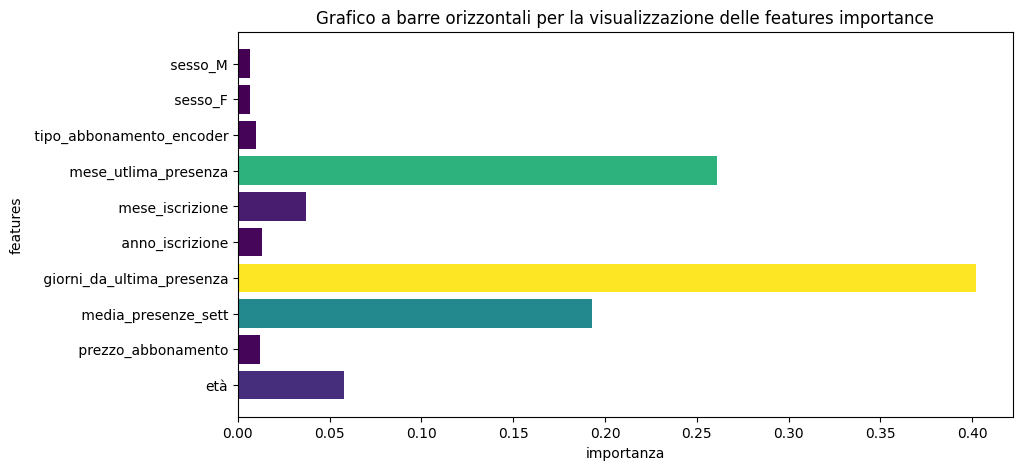

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=min(importanza), vmax=max(importanza))
cmap = cm.get_cmap('viridis')

colors = cmap(norm(importanza))

plt.figure(figsize=(10,5))
plt.barh(lista, importanza, color=colors)
plt.title("Grafico a barre orizzontali per la visualizzazione delle features importance")
plt.xlabel("importanza")
plt.ylabel("features")
plt.show()

MEDIA CHURN = 1, MEDIA CHURN = 1 CORRELATO AD ETA' E RESTITUIZIONE DI PERSONE CON LO STESSO PROBLEMA

In [25]:
totale_churn1 = len(df_encoded[df_encoded["churn"]==1])
media_churn = (df_encoded["churn"]==1).mean()
print(f"il numero totale di clienti che hanno abbandonato e' {totale_churn1}, e quindi circa il {media_churn*100:.2f}%")


filtro = (df_encoded["churn"] == 1) & (df_encoded["età"] >= valori[0])
df_presenze = df_encoded.loc[filtro, ["giorni_da_ultima_presenza", "età"]]
media_churn_eta_ultimaPresenza = df_presenze["giorni_da_ultima_presenza"].mean()
giorni = 30
for i in range (1,12):
    if media_churn_eta_ultimaPresenza <=  giorni * i:
        print(f"in media le persone con eta' maggiore di {valori[0]} anni, abbandonano la palestra dopo {i} mese/i")
        break

media_presenzeSett_churn = df_encoded[df_encoded["churn"] == 1]["media_presenze_sett"].mean()
media_presenzeSett_non_churn = df_encoded[df_encoded["churn"] == 0]["media_presenze_sett"].mean()

soglia = 1.5
if media_presenzeSett_churn < 1:
    print(f"In media, chi ha abbandonato si allenava {media_presenzeSett_churn:.2f} volte a settimana. Praticamente meno di 1 volta a settimana")
elif media_presenzeSett_churn < soglia:
    print(f"In media, chi ha abbandonato si allenava {media_presenzeSett_churn:.2f} volte a settimana.")
elif (media_presenzeSett_churn > soglia) and (media_presenzeSett_churn < media_presenzeSett_non_churn):
    print(f"In media, chi ha mantenuto l'abbonamento si allenava {media_presenzeSett_non_churn:.2f} volte a settimana.")


il numero totale di clienti che hanno abbandonato e' 272, e quindi circa il 27.20%
in media le persone con eta' maggiore di 50.0 anni, abbandonano la palestra dopo 3 mese/i
In media, chi ha abbandonato si allenava 0.84 volte a settimana. Praticamente meno di 1 volta a settimana


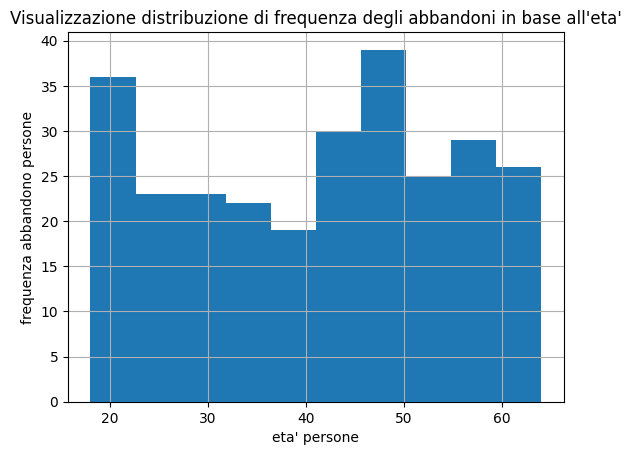

In [26]:
import matplotlib.pyplot as plt

x = df_encoded[df_encoded["churn"] == 1]["età"]

plt.hist(x)
plt.title("Visualizzazione distribuzione di frequenza degli abbandoni in base all'eta'")
plt.xlabel("eta' persone")
plt.ylabel("frequenza abbandono persone")
plt.grid()
plt.show()

In [27]:
# churn_tipoAbb_ann = len(df_encoded[(df_encoded["churn"] == 1) & (df_encoded["tipo_abbonamento_encoder"] == 0)])
# print(f"il numero di persone che ha abbandonato con un abbonamento annuale e' {churn_tipoAbb_ann}")


# churn_tipoAbb_mens = len(df_encoded[(df_encoded["churn"] == 1) & (df_encoded["tipo_abbonamento_encoder"] == 1)])
# print(f"il numero di persone che ha abbandonato con un abbonamento mensile e' {churn_tipoAbb_mens}")


# churn_tipoAbb_trim = len(df_encoded[(df_encoded["churn"] == 1) & (df_encoded["tipo_abbonamento_encoder"] == 2)])
# print(f"il numero di persone che ha abbandonato con un abbonamento trimestrale e' {churn_tipoAbb_trim}")


# churn_media_abb_mens = df_encoded[df_encoded["tipo_abbonamento_encoder"]==1]["churn"].mean()
# print(f"quindi il {churn_media_abb_mens*100:.2f}% delle persone abbandona con l'abbonamento mensile")

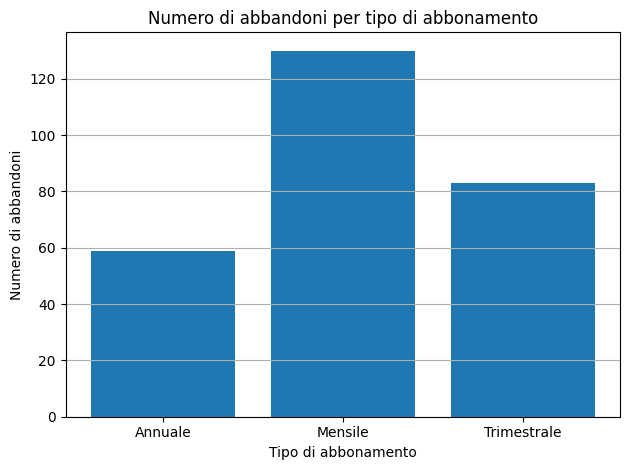

In [28]:
import matplotlib.pyplot as plt

churn_counts = df_encoded[df_encoded["churn"] == 1]["tipo_abbonamento_encoder"].value_counts().sort_index()

labels = ["Annuale", "Mensile", "Trimestrale"]

plt.bar(labels, churn_counts)
plt.title("Numero di abbandoni per tipo di abbonamento")
plt.xlabel("Tipo di abbonamento")
plt.ylabel("Numero di abbandoni")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [29]:
from datetime import datetime

mese_corrente = datetime.now().month

soldi = valori[1]
mese_finale = valori[6]
if mese_finale < 12:
    mesi_mancanti = 12 - mese_finale
    soldi_persi = soldi * mesi_mancanti
print(f"i soldi potenzialmente persi per l'abbandono di questo cliente, ammonterebbero a {soldi_persi:.2f} euro")

filtro_soldi = (df_encoded["churn"]==1) & (df_encoded["tipo_abbonamento_encoder"]==1) & (df_encoded["mese_ultima_presenza"] <= 6)
perdita_totale = df_encoded.loc[filtro_soldi, "prezzo_abbonamento"].sum()
print(perdita_totale)

i soldi potenzialmente persi per l'abbandono di questo cliente, ammonterebbero a 663.20 euro
3900


In [30]:
import joblib

joblib.dump(model, "modello_churn.pkl")
print("Modello salvato con successo in 'modello_churn.pkl'")

Modello salvato con successo in 'modello_churn.pkl'
